In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df=pd.read_csv('force2020_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [182]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

# Missing value handling 

In [185]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [187]:
nphi_median= df['NPHI'].median()
df['NPHI']= df['NPHI'].fillna(nphi_median)

In [189]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.414749,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.118486,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.344193,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.491632,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [191]:
#df['DTC']=pd.to_numeric(df['DTC'])
df['PEF']=pd.to_numeric(df['PEF'])

In [193]:
df['PEF']=df['PEF'].fillna(df['PEF'].median())
df['DTC']=df['DTC'].fillna(df['DTC'].mean())

In [195]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

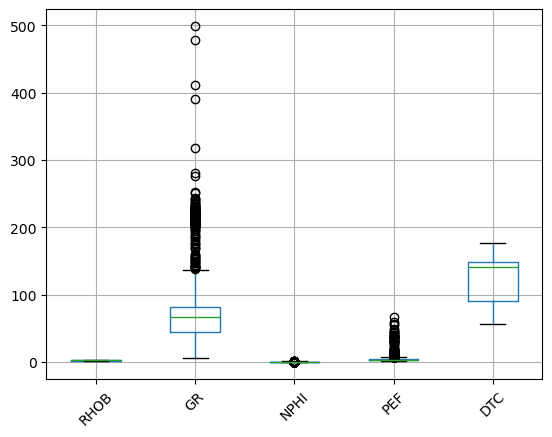

In [197]:
# OUTLIERS

df.drop('DEPTH_MD',axis=1).boxplot()
plt.xticks(rotation = 45)
plt.show()

In [199]:
def replace_outliers(df,col_name):
    q1= df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    up_bound= q3 + 1.5*iqr
    low_bound= q1 - 1.5* iqr

    outliers = df[(df[col_name] < low_bound) | (df[col_name] > up_bound)]
    df[col_name].clip(upper=up_bound,inplace=True)
    df[col_name].clip(lower=low_bound,inplace=True)
    #print(f"\n{col_name}\n",outliers[col_name])
    return df[col_name]

for col in df.columns:
    df[col]=replace_outliers(df,col)

C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_13344\3264056979.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].clip(upper=up_bound,inplace=True)
C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_13344\3264056979.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

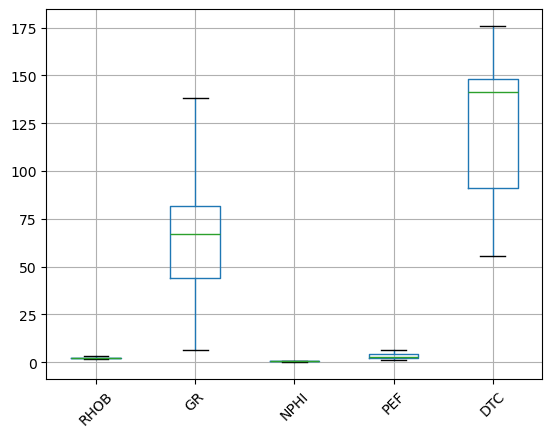

In [201]:
# OUTLIERS REMOVED

df.drop('DEPTH_MD',axis=1).boxplot()
plt.xticks(rotation = 45)
plt.show()

In [98]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000
mean,2.110451,63.305876,1883.228478,0.415692,3.222253,125.106178
std,0.297725,26.068610,801.941195,0.115886,1.403155,30.550384
min,1.404576,6.191506,494.528000,0.123033,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.344193,2.355565,90.948286
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.197800
75%,2.381963,81.542681,2577.802000,0.491632,4.046910,148.012402
max,2.927888,138.056667,3272.024000,0.712791,6.583927,175.953140


In [227]:
X=df[['RHOB','DEPTH_MD']]

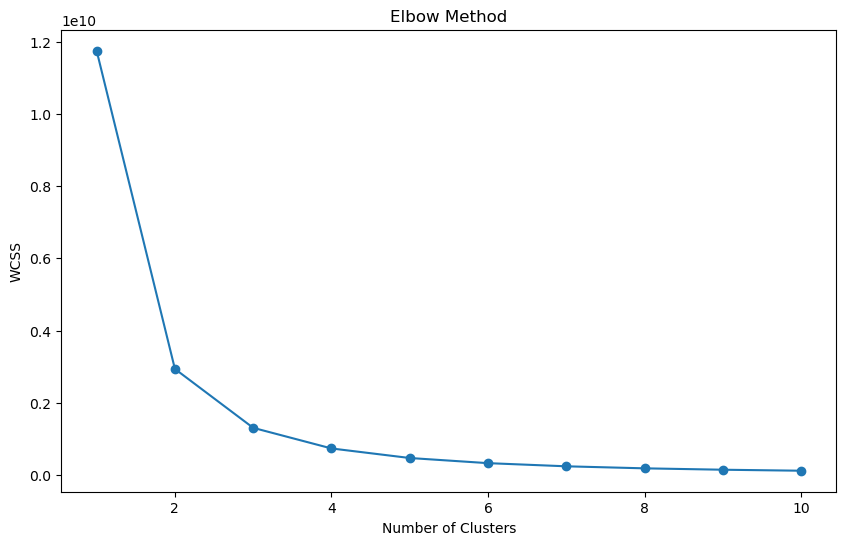

In [229]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [137]:
# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,4Cluster,Cluster
0,1.884186,80.200851,494.528,0.448527,6.583927,161.131180,1,1
1,1.889794,79.262886,494.680,0.448527,6.583927,160.603470,1,1
2,1.896523,74.821999,494.832,0.448527,6.583927,160.173615,1,1
3,1.891913,72.878922,494.984,0.448527,6.583927,160.149429,1,1
4,1.880034,71.729141,495.136,0.448527,6.583927,160.128342,1,1


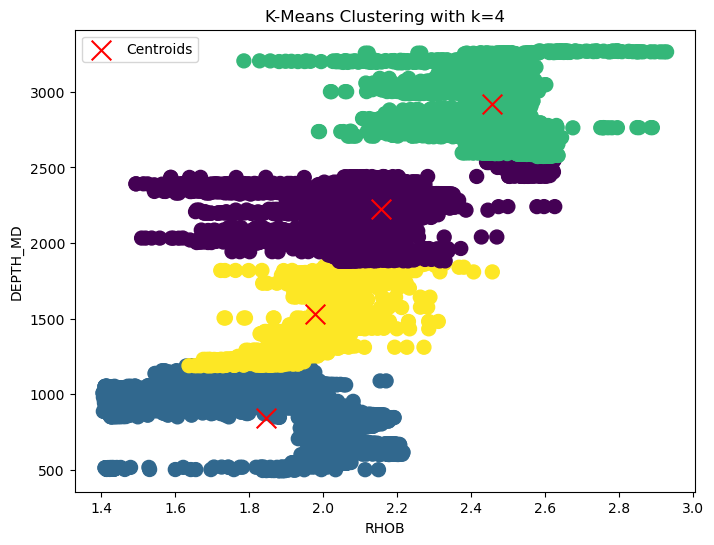

In [139]:
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['RHOB'], df['DEPTH_MD'], c=df['Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('RHOB')
plt.ylabel('DEPTH_MD')
plt.title('K-Means Clustering with k=4')
plt.legend()
plt.show()

In [143]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print("SCore of 4 clusters = ",silhouette_avg1)

SCore of 4 clusters =  0.5718001980342725


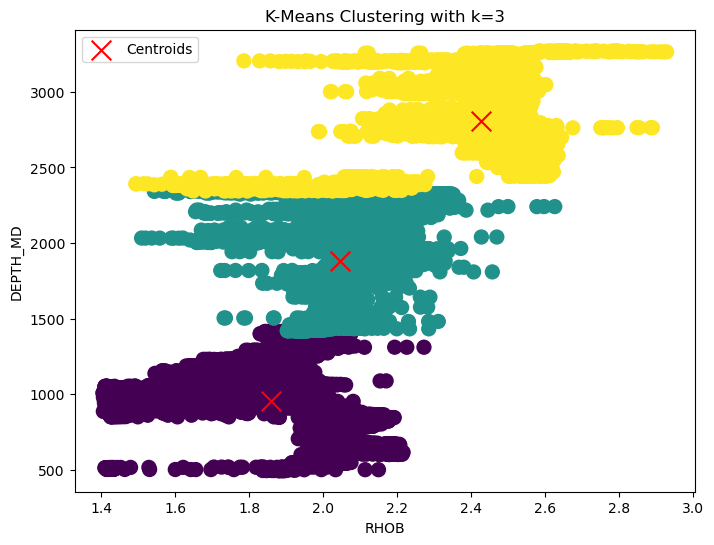

SCore of 3 clusters =  0.5901414743721461


In [231]:
# k=3
# applying k means clustering with optimal number of clusters
k3means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k3means = k3means.fit_predict(X)

# Adding cluster labels to the dataset
df['3Cluster'] = y_k3means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['RHOB'], df['DEPTH_MD'], c=df['3Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k3means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('RHOB')
plt.ylabel('DEPTH_MD')
plt.title('K-Means Clustering with k=3')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k3means)
print("SCore of 3 clusters = ",silhouette_avg1)

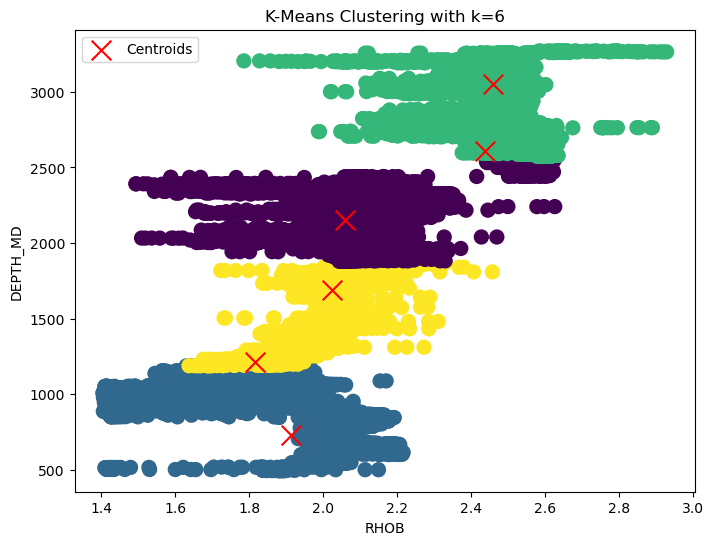

SCore of 6 clusters =  0.5532425094463628


In [159]:
# k=6
# applying k means clustering with optimal number of clusters
k6means = KMeans(n_clusters = 6, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k6means = k6means.fit_predict(X)

# Adding cluster labels to the dataset
df['6Cluster'] = y_k6means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['RHOB'], df['DEPTH_MD'], c=df['6Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k6means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('RHOB')
plt.ylabel('DEPTH_MD')
plt.title('K-Means Clustering with k=6')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k6means)
print("SCore of 6 clusters = ",silhouette_avg1)

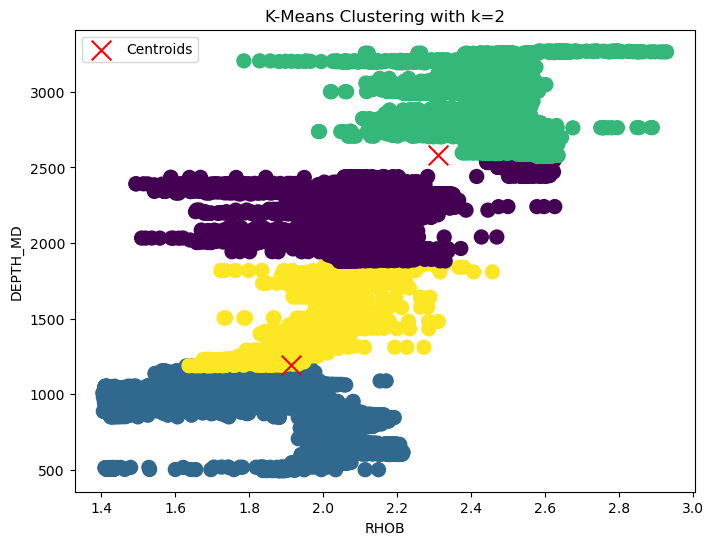

SCore of 6 clusters =  0.6267580766559142


In [161]:
# k=2
# applying k means clustering with optimal number of clusters
k2means = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k2means = k2means.fit_predict(X)

# Adding cluster labels to the dataset
df['3Cluster'] = y_k2means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['RHOB'], df['DEPTH_MD'], c=df['3Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k2means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('RHOB')
plt.ylabel('DEPTH_MD')
plt.title('K-Means Clustering with k=2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k2means)
print("SCore of 6 clusters = ",silhouette_avg1)

# Out of all  Clustering outcomes, the CLustering with 2 centeroids i.e The Kmeans model with K=2 showed the Most silhouette score which is 62.67% followed by 59% for k=3 and k=6 had the least score 55%. 

# Considering the Downward trend of score with increasing centroids, we can assume that only a 2 centroid model can provide best classification for this dataset

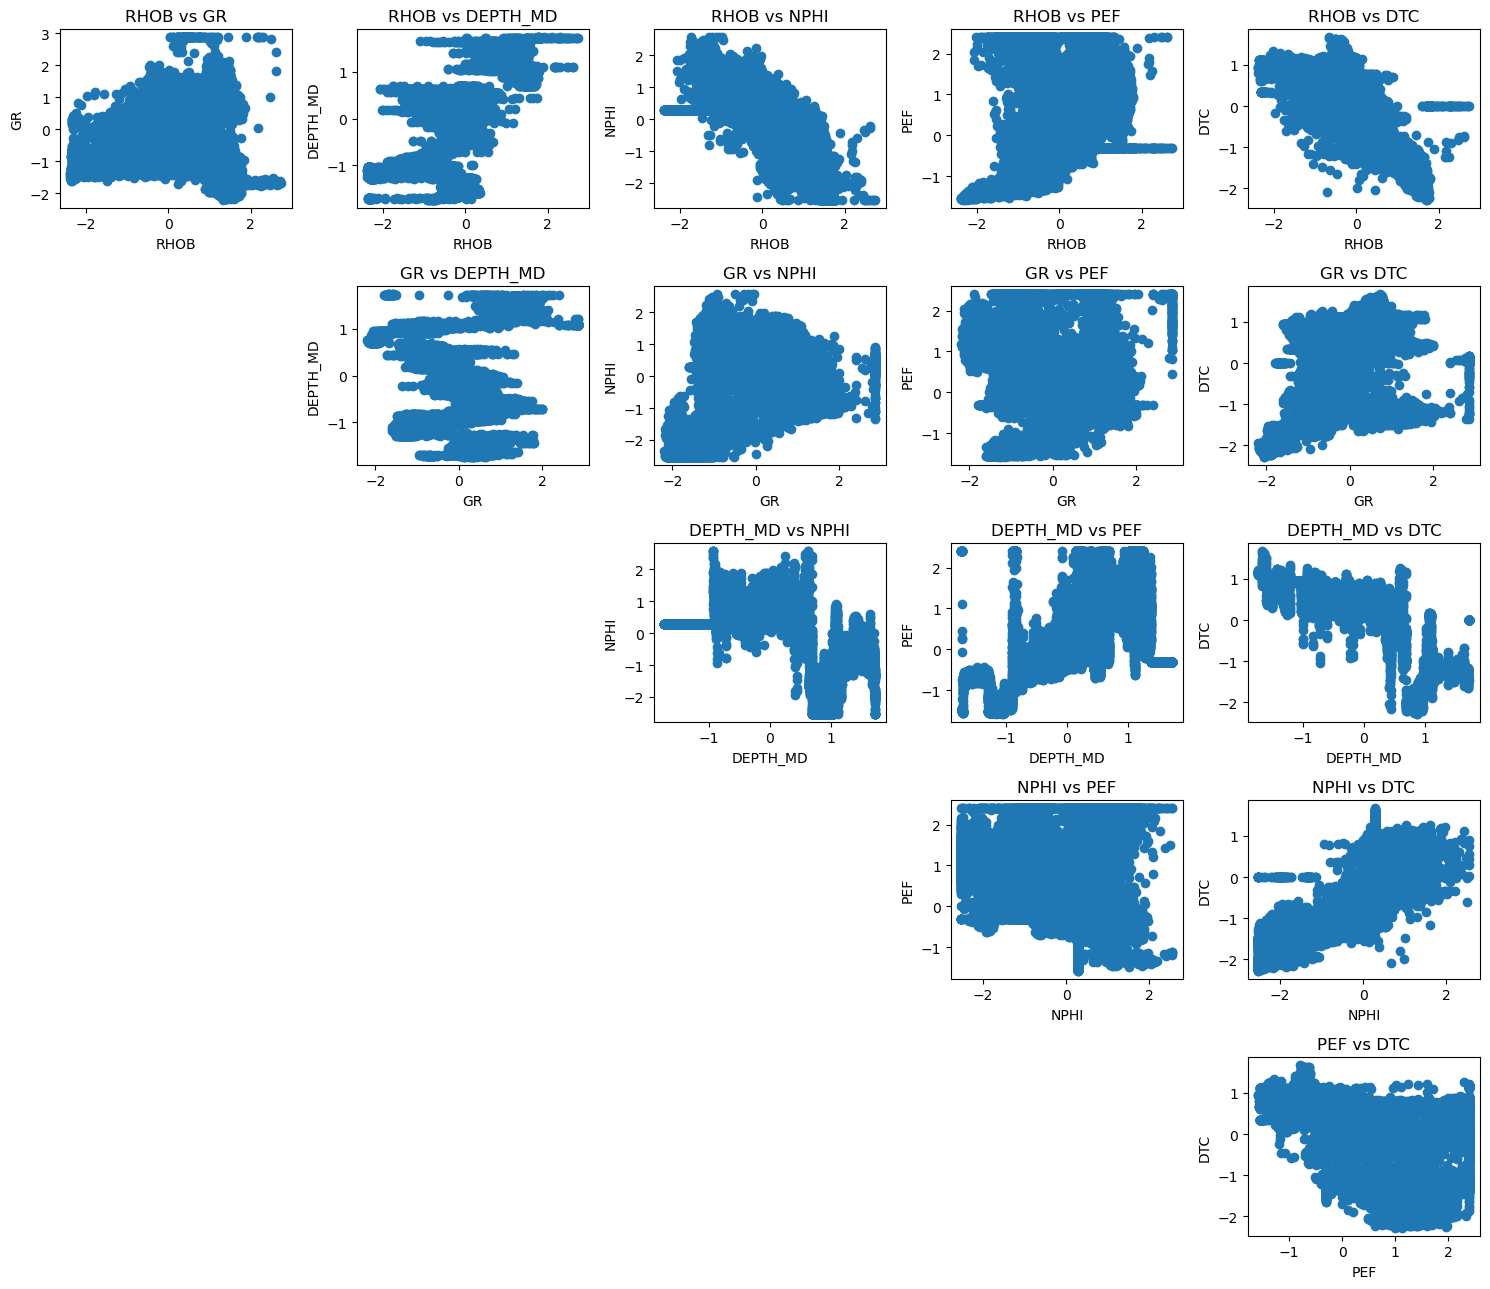

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Step 2: Scatter plots for each pair of features to show how spread out the data is
pairwise_combinations = df.columns

plt.figure(figsize=(15, 13))
for i, col1 in enumerate(pairwise_combinations):
    for j, col2 in enumerate(pairwise_combinations):
        if i < j:  # Only plot the upper triangle of combinations
            plt.subplot(len(pairwise_combinations)-1, len(pairwise_combinations)-1, i*(len(pairwise_combinations)-1) + j)
            plt.scatter(df_scaled[col1], df_scaled[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f"{col1} vs {col2}")
plt.tight_layout()
plt.show()


In [ ]:
# from this scatterplot representation, it is assessible that (nphi vs dtc) and (RHOB vs DTC) will perform best for k=2 model
# Upon application, 2 Centeroid clusters proid

<Figure size 800x600 with 0 Axes>

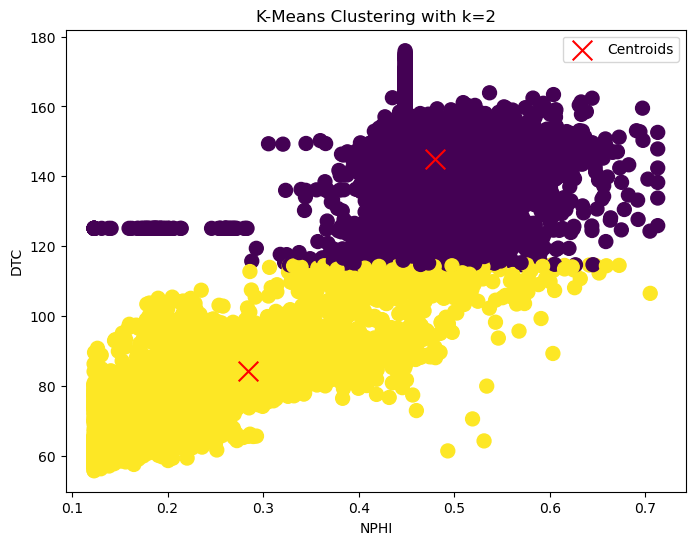

SCore of 2 clusters =  0.7799453816190773


In [207]:
# NPHI VS DTC

X=df[['NPHI','DTC']]
k2means = KMeans(n_clusters =2 , init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k2means = k2means.fit_predict(X)

# Adding cluster labels to the dataset
df['2Cluster'] = y_k2means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['NPHI'], df['DTC'], c=df['2Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k2means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('NPHI')
plt.ylabel('DTC')
plt.title('K-Means Clustering with k=2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k2means)
print("SCore of 2 clusters = ",silhouette_avg1)

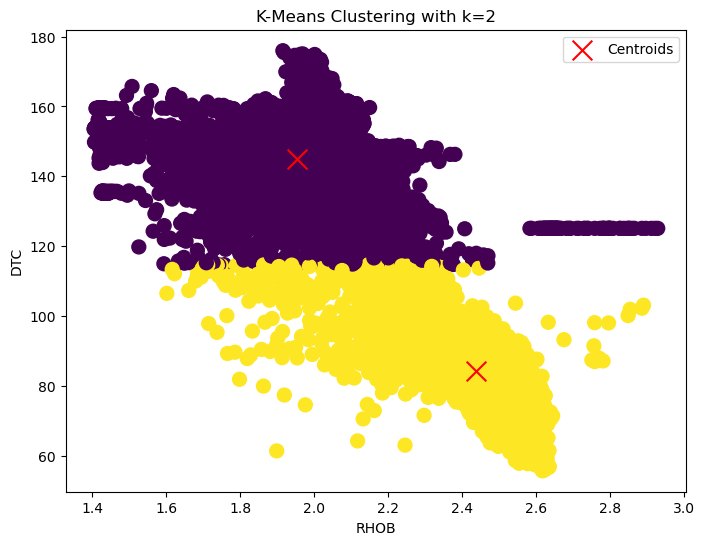

SCore of 2 clusters =  0.779856261059792


In [233]:
# NPHI VS DTC

X=df[['RHOB','DTC']]
k2means = KMeans(n_clusters =2 , init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k2means = k2means.fit_predict(X)

# Adding cluster labels to the dataset
df['2Cluster'] = y_k2means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['RHOB'], df['DTC'], c=df['2Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k2means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('RHOB')
plt.ylabel('DTC')
plt.title('K-Means Clustering with k=2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k2means)
print("SCore of 2 clusters = ",silhouette_avg1)

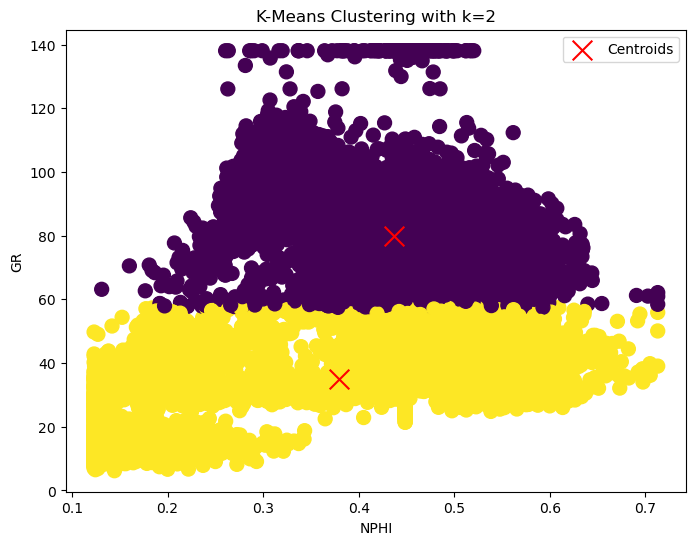

SCore of 2 clusters =  0.6042326029296544


In [219]:
# NPHI VS DTC

X=df[['NPHI','GR']]
k2means = KMeans(n_clusters =2 , init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k2means = k2means.fit_predict(X)

# Adding cluster labels to the dataset
df['2Cluster'] = y_k2means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['NPHI'], df['GR'], c=df['2Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k2means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('NPHI')
plt.ylabel('GR')
plt.title('K-Means Clustering with k=2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k2means)
print("SCore of 2 clusters = ",silhouette_avg1)

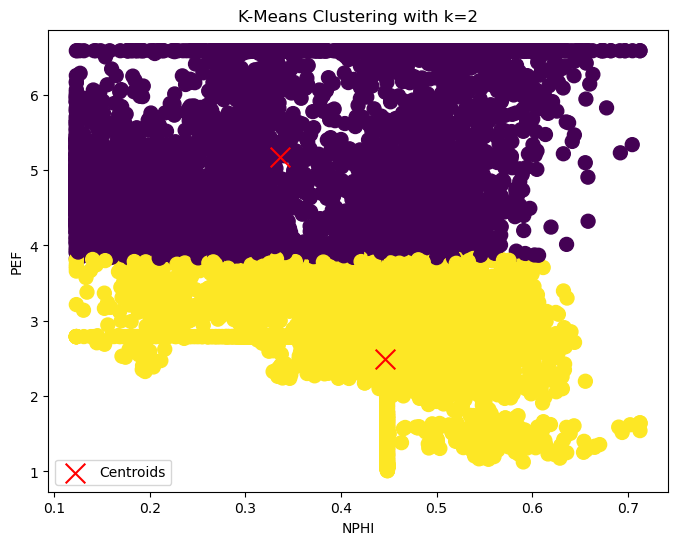

SCore of 2 clusters =  0.6714633605780034


In [221]:
# GR vs PEF

X=df[['NPHI','PEF']]
k2means = KMeans(n_clusters =2 , init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_k2means = k2means.fit_predict(X)

# Adding cluster labels to the dataset
df['2Cluster'] = y_k2means
df.head()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(df['NPHI'], df['PEF'], c=df['2Cluster'], cmap='viridis', s=100)

# Plot the centroids (cluster centers)
centroids = k2means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('NPHI')
plt.ylabel('PEF')
plt.title('K-Means Clustering with k=2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_k2means)
print("SCore of 2 clusters = ",silhouette_avg1)